In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
notas = pd.read_csv('dados/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
#  renomeando nome das variáveis para português
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# valores únicos para notas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
#  distribuição de frequência para cada nota
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
# media de todas as notas
notas['nota'].mean()

3.501556983616962

In [8]:
# plotar = imprimir visualmente
notas['nota'].plot(kind='hist')

In [9]:
print('Média: ', notas['nota'].mean())
print('Mediana: ', notas['nota'].median())

Média:  3.501556983616962
Mediana:  3.5


In [10]:
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

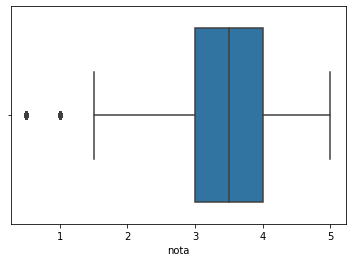

In [11]:
# analisando distribuição de notas visualmente
import seaborn as sns

sns.boxplot(notas.nota)

In [12]:
# carregando arquivo de filmes
filmes = pd.read_csv('dados/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
## Analisando notas

In [14]:
# visualizar media de notas do filme Toy Story
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [15]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [16]:
# DATASET = forma genérica para me referir aos dados
# DATAFRAME = os dados que carreguei no pandas

In [17]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

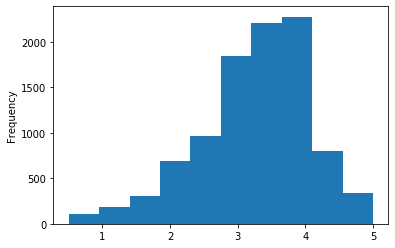

In [18]:
# distribuição de medias por filme
medias_por_filme.plot(kind='hist')

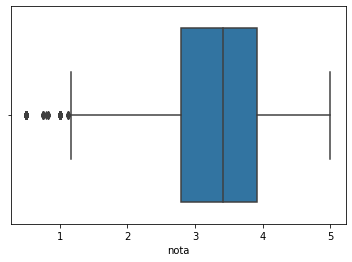

In [19]:
sns.boxplot(medias_por_filme)

In [20]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

#### Notas: O histograma também é conhecido como "distribuição de frequências".  
(https://pt.wikipedia.org/wiki/Histograma)
#### Já boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.
(https://pt.wikipedia.org/wiki/Diagrama_de_caixa)

## TMDB 5000 Movie Dataset
(https://www.kaggle.com/tmdb/tmdb-movie-metadata)

In [23]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

#### Notas: As variáveis categóricas são aquelas que não possuem valores quantitativos, epresentam uma classificação dos indivíduos. Podem ser nominais ou ordinais.
(http://leg.ufpr.br/~silvia/CE055/node8.html)

##### A maneira mais básica de compararmos categorias é descobrindo quantas vezes cada uma delas aparece. 

In [36]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['idioma_original', 'total']
contagem_de_lingua.head()

,idioma_original,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


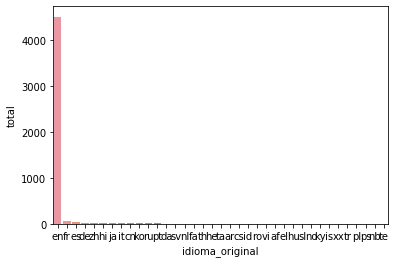

In [72]:
sns.barplot(x= 'idioma_original', y='total', data = contagem_de_lingua);

Além das plotagens de "baixo nível", como o barplot(), que nos fornecem mais controle sobre cada etapa do processo, existem as de mais alto nível, como o catplot(), que realiza uma plotagem baseada em categorias.

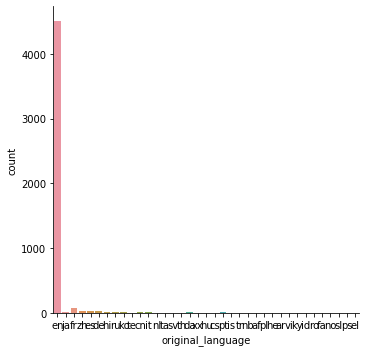

In [48]:
# catplot = imprime por categoria
sns.catplot(x='original_language', kind='count', data=tmdb);

Uma das grandes áreas de estudo na ciência de dados é justamente a **visualização** ("data visualization"), que busca determinar que tipo de gráfico funciona melhor de acordo com a circunstância.

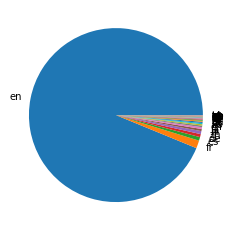

In [73]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['idioma_original']);

O gráfico de pizza não costuma ser recomendado, afinal, a olho nu, é muito difícil entender as diferenças proporcionais entre as áreas de cada fatia.

In [55]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


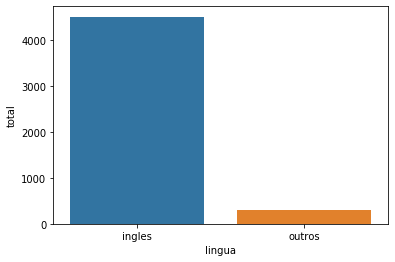

In [74]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data=dados);

In [75]:
total_por_outras_linguas = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_outras_linguas

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
ro     2
cs     2
ta     2
ar     2
pl     1
is     1
xx     1
no     1
te     1
el     1
ps     1
hu     1
ky     1
vi     1
af     1
sl     1
tr     1
nb     1
Name: original_language, dtype: int64

In [76]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')

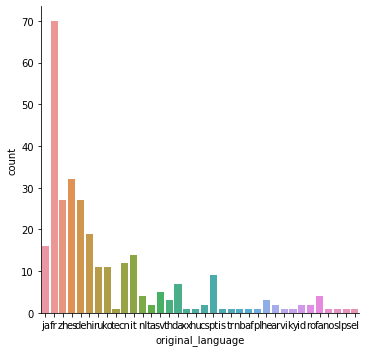

In [82]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles);

 A escolha do tipo de gráfico influencia muito na análise das nossas informações.
 
 Quando estamos trabalhando com data visualization, é comum nos preocuparmos com alguns refinamentos para tornar as informações mais compreensíveis.

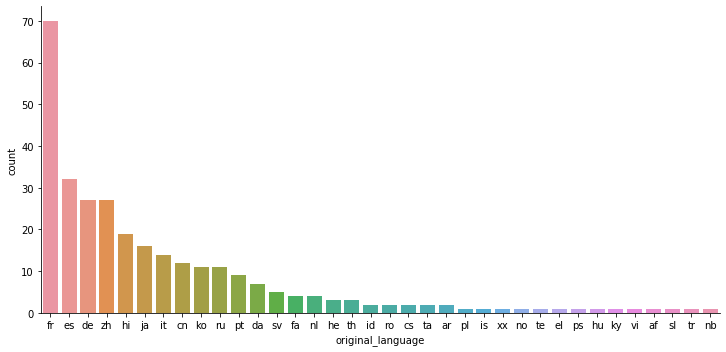

In [84]:
sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            order=total_por_outras_linguas.index);

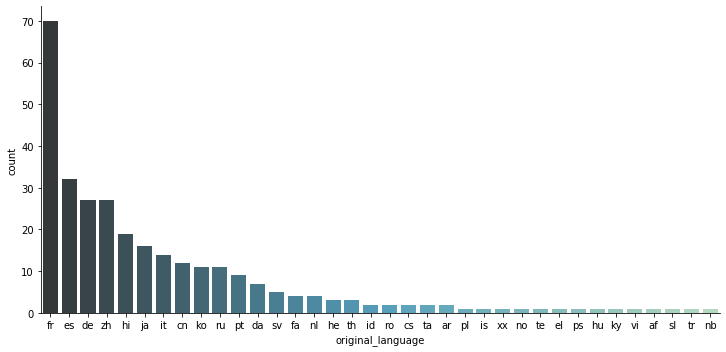

In [85]:
sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            palette='GnBu_d',
            order=total_por_outras_linguas.index);

Com o Seaborn, somos capazes de criar vários tipos de gráficos ou visualizações. Além dos gráficos de barras (histogramas) e diagrama de caixa (boxplot), um outro exemplo de gráfico que pode ser criado com essa biblioteca é o gráfico linear:

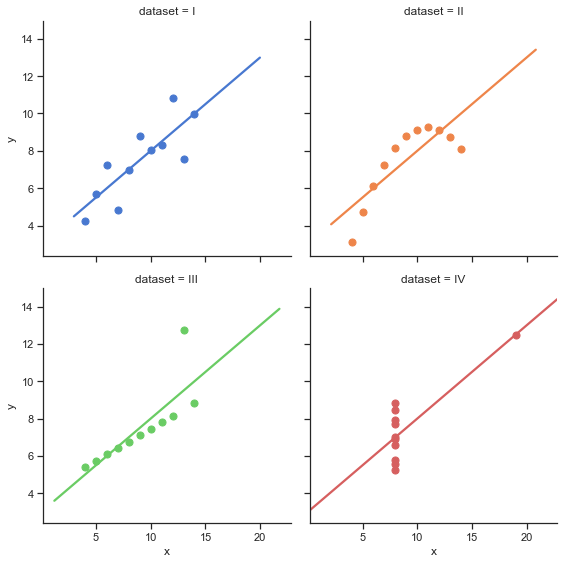

In [89]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

#### Revisando o papel da médida, mediana, medidas de tendência central, dispersão, desvio padrão, box-plot, histograma

In [90]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [93]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [109]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114045 0.8817134921476455


In [110]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median()) 

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [113]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [114]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

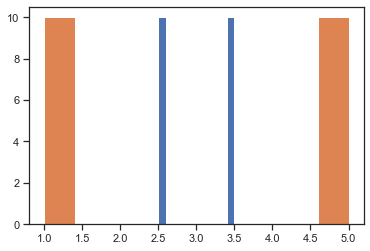

In [117]:
plt.hist(filme1)
plt.hist(filme2)

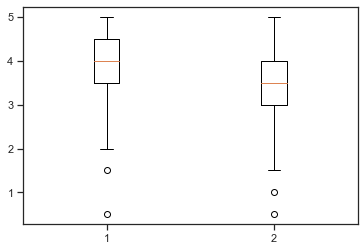

In [100]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota]);

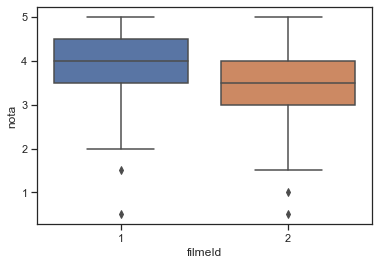

In [105]:
sns.boxplot(x='filmeId', y='nota', data= notas.query('filmeId in [1, 2]'));

Existe uma maneira numérica de averiguar quão distantes os outros pontos estão das medidas de tendência central.

Essa medida existe e é chamado de **desvio padrão** (ou standard deviation), um parâmetro que indica o quanto os dados do conjunto fogem de uma tendência central.

In [106]:
notas_do_jumanji.nota.std()

0.8817134921476455

In [107]:
notas_do_toy_story.nota.std()

0.8348591407114045